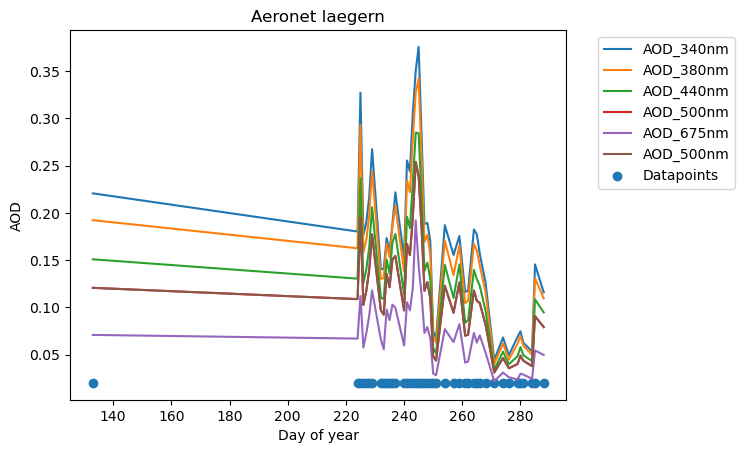

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython.display import display 
import chardet
location = 'laegern'

data_aeronet = pd.DataFrame()
folder_path = f'../data_aeronet/{location}/'
for filename in os.listdir(folder_path):
        # Full path to the file
        file_path = os.path.join(folder_path, filename)
        # Check if it's a file (not a subdirectory)
        if os.path.isfile(file_path):
            #print(filename)
            data_aeronet = pd.concat([data_aeronet, pd.read_csv((folder_path+filename), skiprows=6, encoding='ISO-8859-9')], axis=0)
            
data_aeronet = data_aeronet.replace(-999, np.nan)
data_aeronet['Date(dd:mm:yyyy)'] = pd.to_datetime(data_aeronet['Date(dd:mm:yyyy)'], format='%d:%m:%Y')
data_aeronet = data_aeronet.replace(-9999, np.nan)

wavelengths_aer = ['AOD_340nm', 'AOD_380nm','AOD_440nm', 'AOD_500nm','AOD_675nm','AOD_500nm']
for wavelength in wavelengths_aer:
    plt.plot(data_aeronet['Day_of_Year'], data_aeronet[wavelength], label=wavelength)


plt.scatter(data_aeronet['Day_of_Year'], np.full((data_aeronet.shape[0],), 0.02), label='Datapoints')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Day of year')
plt.ylabel('AOD')
plt.title(f'Aeronet {location}')
plt.show()

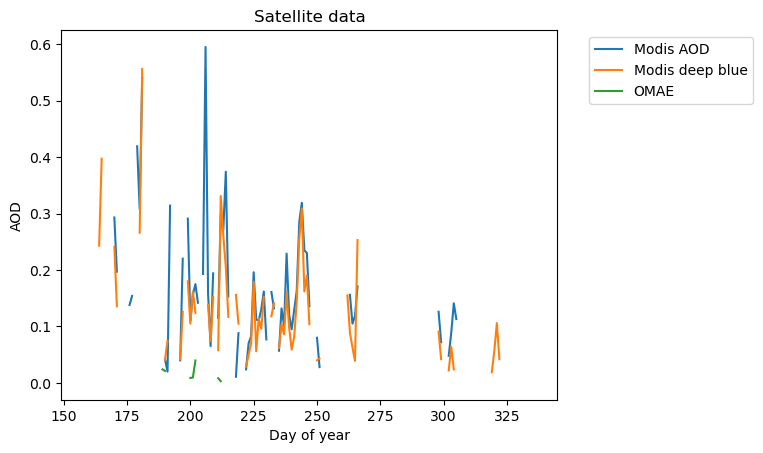

In [56]:

modisAOD = pd.read_csv(r'../data_satelite/g4.areaAvgTimeSeries.MOD08_D3_6_1_Aerosol_Optical_Depth_Land_Ocean_Mean.20240601-20241201.7E_47N_8E_48N.csv', skiprows=7)
modis_deep_blue = pd.read_csv(r'../data_satelite/g4.areaAvgTimeSeries.MOD08_D3_6_1_Deep_Blue_Aerosol_Optical_Depth_550_Land_Mean.20240601-20241201.7E_47N_8E_48N.csv', skiprows=7)
AOD_463 = pd.read_csv(r'../data_satelite/g4.areaAvgTimeSeries.OMAEROe_003_AbsorbingAerosolOpticalThicknessMW_463_0.20240601-20241201.7E_47N_8E_48N.csv', skiprows=7)

modisAOD = modisAOD.replace(-9999, np.nan)
modis_deep_blue = modis_deep_blue.replace(-9999,np.nan)
AOD_463 = AOD_463.replace(-32767, np.nan)
data_satelite = pd.concat([modisAOD, modis_deep_blue.drop(columns='time'),AOD_463.drop(columns='time')], axis=1)
data_satelite['time'] = pd.to_datetime(data_satelite['time'], format='%Y-%m-%d')
data_satelite.columns = ['time', 'Modis AOD', 'Modis deep blue', 'OMAE']

instruments = ['Modis AOD', 'Modis deep blue', 'OMAE']
for instrument in instruments:
    plt.plot(data_satelite['time'].dt.dayofyear, data_satelite[instrument], label=instrument )

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Satellite data')
plt.xlabel('Day of year')
plt.ylabel('AOD')
plt.show()

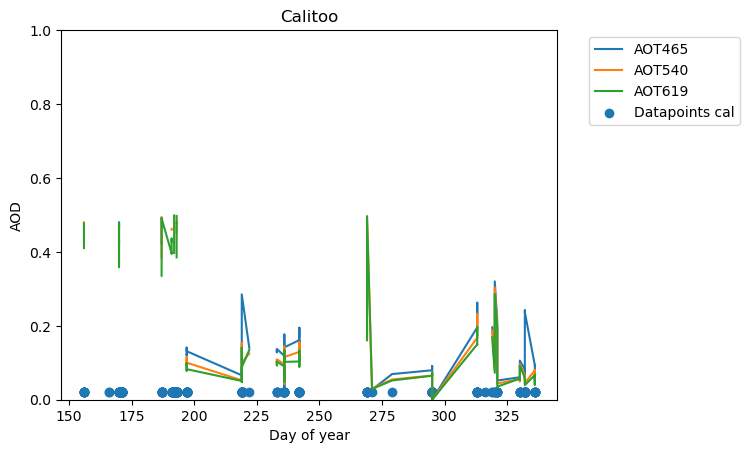

In [58]:
#sett alpha <2, r2 >0.95
data_calitoo_ours = pd.read_csv(r'../Daten calitoo/0124_20240604_075512_10_ours_adjusted.txt', delimiter=';', skiprows=6)

data_calitoo_ours['Date'] = pd.to_datetime(data_calitoo_ours['Date'], format='%Y-%m-%d')

wavelengths_cal = ['AOT465', 'AOT540', 'AOT619']
for wavelength in wavelengths_cal:
    plt.plot(data_calitoo_ours['Date'].dt.dayofyear, data_calitoo_ours[wavelength].where(data_calitoo_ours[wavelength]<0.5), label=wavelength)
plt.scatter(data_calitoo_ours['Date'].dt.dayofyear, np.full((data_calitoo_ours.shape[0],), 0.02), label='Datapoints cal')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Day of year')
plt.ylabel('AOD')
plt.title('Calitoo')
plt.ylim([0,1])
plt.show()

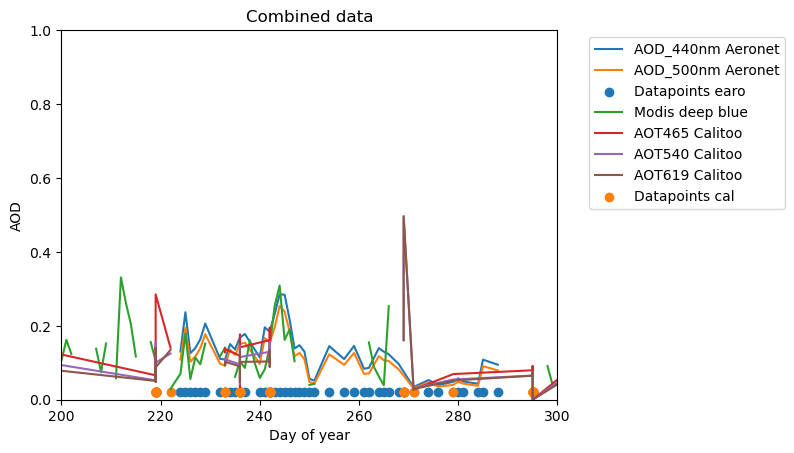

In [21]:
wavelengths_aer = ['AOD_440nm', 'AOD_500nm'] # 'AOD_340nm', 'AOD_380nm',,'AOD_675nm','AOD_500nm'
wavelengths_cal = ['AOT465', 'AOT540', 'AOT619']
instruments = ['Modis deep blue'] #, 'OMAE' 'Modis AOD',



for wavelength in wavelengths_aer:
    plt.plot(data_aeronet['Day_of_Year'], data_aeronet[wavelength], label=f'{wavelength} Aeronet')
plt.scatter(data_aeronet['Day_of_Year'], np.full((data_aeronet.shape[0],), 0.02), label='Datapoints earo')

for instrument in instruments:
    plt.plot(data_satelite['time'].dt.dayofyear, data_satelite[instrument], label=instrument )


for wavelength in wavelengths_cal:
    plt.plot(data_calitoo_ours['Date'].dt.dayofyear, data_calitoo_ours[wavelength].where(data_calitoo_ours[wavelength]<0.5),  label=f'{wavelength} Calitoo')
plt.scatter(data_calitoo_ours['Date'].dt.dayofyear, np.full((data_calitoo_ours.shape[0],), 0.02), label='Datapoints cal')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('Day of year')
plt.ylabel('AOD')
plt.title('Combined data')
plt.ylim([0,1])
plt.xlim([200,300])
plt.show()